### (이 책에서 명시하는) 모델 선택이란? 
하이퍼파라미터 튜닝 (최선의 하이퍼파라미터를 선택) + 최선의 학습 알고리즘 선택  
Q. hyperparameter란?  
A. 훈련하기 전에 선택해야만 하는 학습 알고리즘을 위한 세팅  

왜 중요한가?    
* 머신러닝 = 알고리즘을 훈련하여 손실 함수를 최소화시킴으로써 모델의 파라미터를 학습함 
    -> 자체적으로 최적값 발견
* But, 학습 과정 밖에서 정의되어야 하는 하이퍼파라미터가 존재함
    * ex. 랜덤 포레스트 : 앙상블할 결정 트리 개수를 미리 지정해줘야 함
* And, 여러 학습 알고리즘을 시도하고 비교하여 가장 목적적합한 모델을 선택해야 한다


### INDEX
1. 최선의 모델 선택하기 by 완전탐색
2. 최선의 모델 선택하기 by 랜덤탐색
3. 여러 학습 알고리즘 중 최선의 모델 선택하기
4. 최선의 모델 선택하기 with 전처리
5. 모델 선택 속도 높이기 by 병렬화 : 모델 선택의 처리 속도를 높이자
6. 모델 선택 수행 속도 높이기 by 알고리즘에 특화된 기법 사용
7. 모델 선택 후 성능 평가하기 : 최종 단계!

## 12.1 완전 탐색을 사용해 최선의 모델 선택하기 
하이퍼파라미터의 '범위'를 검사하여 최선의 모델을 선택하고 싶다  
### GridSearchCV  
하나 이상의 하이퍼파라미터에 대해 가능성있는 값을 정의하고, 모든 조합에 대해 모델을 훈련하는 방법  
최고 성능 점수를 내는 모델이 최선의 모델로 선택된다  

* 기타 모형 최적화 관련 내용 :  https://datascienceschool.net/view-notebook/ff4b5d491cc34f94aea04baca86fbef8/
* verbose = 0,1,2,3 : 숫자가 커질수록 GridSearchCV 과정을 제대로 수행하고 있는지 설명하는 값을 많이 출력해준다
* brute-force 방식이다 = 억지방식이다

In [2]:
import numpy as np
from sklearn import linear_model, datasets
from sklearn.model_selection import GridSearchCV

In [4]:
#1. 데이터 로드하고, feature과 target으로 분류하기
iris = datasets.load_iris()
features = iris.data
target = iris.target

In [5]:
#2. 모델링하기 - 로지스틱 회귀
logistic = linear_model.LogisticRegression()

로지스틱 회귀에서는 규제 패널티와 관련된 하이퍼파라미터가 필요하다. 
* 규제 : 복잡한 모델에 패널티를 가해 분산을 줄이는 방법 -> 복잡한 모델에게 패널티를 부과하는 것과 매한가지
    * L1(절대값), L2(제곱) 두 가지 타입이 있다.
* C값 : 1/@ 
    * @ = 규제 강도(패널티를 먹이는 정도)를 조절하는 하이퍼파라미터이다.
    * @가 커지면 규제가 더 세진다. (정비례)
    * 사이킷런에서는 역수인 C를 사용한다.
    * 따라서, c값이 작아지면 규제가 더 세진다. 

In [36]:
#3. penalty 하이퍼 파라미터값의 후보를 만든다.
penalty = ['l1', 'l2']

#4. 규제 하이퍼 파라미터 값의 후보 범위를 만든다
C = np.logspace(0,4,10)

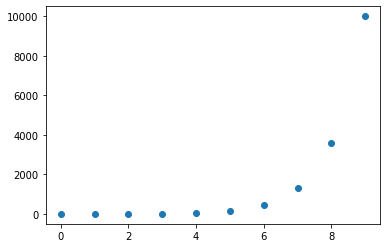

In [41]:
import matplotlib.pyplot as plt
plt.plot(C, 'o')
plt.show()

In [7]:
#5. 하이퍼파라미터 후보 딕셔너리를 만든다
hyperparameters = dict(C=C, penalty=penalty)

hyperparameters

{'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
        5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
        3.59381366e+03, 1.00000000e+04]), 'penalty': ['l1', 'l2']}

### 결론적으로 penalty*C*cv 총 2*10*5 개의 모델 후보 중 가장 좋은 것을 고른다

In [8]:
#6. 그리드서치 객체를 만든다
gridsearch = GridSearchCV(logistic, hyperparameters, cv = 5, verbose = 0)
#7. 그리드서치 수행
best_model= gridsearch.fit(features, target)

/Users/yeonjin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/yeonjin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/yeonjin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/yeonjin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/yeonjin/opt/anaconda3/lib/python3.7/site-pa

/Users/yeonjin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/yeonjin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/yeonjin/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/yeonjin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/yeonjin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.

/Users/yeonjin/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/yeonjin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/yeonjin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/yeonjin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/yeonjin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.

/Users/yeonjin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/yeonjin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/yeonjin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/yeonjin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/yeonjin/opt/anaconda3/lib/python3.7/site-pa

In [9]:
best_model

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
   

### GridSearchCV
GridSearchCV 클래스는 validation_curve 함수와 달리 모형 래퍼(Wrapper) 성격의 클래스이다. 클래스 객체에 fit 메서드를 호출하면 grid search를 사용하여 자동으로 복수개의 내부 모형을 생성하고 이를 모두 실행시켜서 최적 파라미터를 찾아준다. 생성된 복수개와 내부 모형과 실행 결과는 다음 속성에 저장된다.
* 래퍼함수 : 기존 함수를 한 번 감싸서, 원래 동작에 약간의 처리를 해주는 함수  
실행된 복수개의 내부 모형과 실행결과는 다음에 저장된다

* #### grid_scores_ : 
    가치가 없어져서..(굳이 모든 조합 볼 필요가 없으니^^) 사라졌고, cv_results_로 대체되었음 (dict type)  
    * param_grid 의 모든 파리미터 조합에 대한 성능 결과. 각각의 원소는 다음 요소로 이루어진 튜플이다.
    * parameters: 사용된 파라미터
    * mean_validation_score: 교차 검증(cross-validation) 결과의 평균값
    * cv_validation_scores: 모든 교차 검증(cross-validation) 결과
* #### best_score_
    최고 점수
* #### best_params_
    최고 점수를 낸 파라미터
* #### best_estimator_
    최고 점수를 낸 파라미터를 가진 모형

In [19]:
best_model.cv_results_

{'mean_fit_time': array([0.00705361, 0.00085812, 0.00792861, 0.00076237, 0.00814385,
        0.00080986, 0.01050301, 0.00112996, 0.01119108, 0.00085497,
        0.01119647, 0.00085592, 0.01203218, 0.00121651, 0.01291327,
        0.001016  , 0.01296606, 0.00110602, 0.01195927, 0.00097995]),
 'std_fit_time': array([1.32319549e-03, 1.30016225e-04, 1.95935494e-03, 4.99154449e-05,
        1.04084481e-03, 8.28686735e-05, 2.38708892e-03, 2.39527299e-04,
        2.82574094e-03, 5.37399920e-05, 2.60340454e-03, 3.25274949e-05,
        2.92363311e-03, 1.55771147e-04, 2.62000626e-03, 1.49723952e-04,
        3.99483251e-03, 3.99506823e-04, 3.70386192e-03, 1.49614480e-04]),
 'mean_score_time': array([0.00027294, 0.00021272, 0.00021176, 0.00018296, 0.00024953,
        0.00020075, 0.00024257, 0.00020294, 0.00029249, 0.00018244,
        0.00017204, 0.00017447, 0.00020761, 0.00027804, 0.00033236,
        0.00020118, 0.00027618, 0.00019107, 0.00030694, 0.00018673]),
 'std_score_time': array([3.20831689e-

In [21]:
best_model.best_score_

0.98

In [13]:
best_model.best_params_

{'C': 7.742636826811269, 'penalty': 'l1'}

In [29]:
print('가장 좋은 penalty : ', best_model.best_params_['penalty'] , '\n가장 좋은 C : ', best_model.best_params_['C'])

가장 좋은 penalty :  l1 
가장 좋은 C :  7.742636826811269


In [14]:
best_model.best_estimator_

LogisticRegression(C=7.742636826811269, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

최선의 하이퍼파라미터를 확인한 후에, 폴드 하나 뺐던 데이터셋이 아닌 전체 데이터셋을 활용해서 다시 훈련시킴

In [30]:
# 타겟벡터 예측
best_model.predict(features)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [20]:
# s_logistic = linear_model.LogisticRegression(solver='saga')
# best_model2= gridsearch.fit(features, target)
# best_model2.best_score_

## 12.2 랜덤 탐색을 사용해 최선의 모델 선택하기
완전탐색보다 비용효율적으로 모델을 선택하고 싶다

In [31]:
from scipy.stats import uniform
from sklearn import linear_model, datasets
from sklearn.model_selection import RandomizedSearchCV

In [34]:
iris = datasets.load_iris()
features = iris.data
target = iris.target

logistic = linear_model.LogisticRegression()


In [46]:
penalty = ['l1', 'l2']
# 규제 하이퍼파라미터 값의 후보를 위한 분포를 만든다
C = uniform(loc=0, scale=4)

### 사용자가 제공한 분포에서 랜덤한 하이퍼파라미터 조합을 지정된 횟수만큼 추출하여 조사하는 것이 더욱 효율적 >>> brute-force
분포로 지정하면 중복없이 샘플링한다
* 리스트로 지정하면 중복을 허용하여 랜덤하게 샘플링한다

In [51]:
# 10개의 값을 샘플링한다.
print(C.rvs(10))

[1.51825182 0.48998401 3.02497508 1.88715601 1.25766755 3.10221425
 2.8948983  1.83622326 0.25542023 3.11192823]


In [48]:
# 하이퍼파라미터 옵션 만들기
hyperparameters = dict(C=C, penalty = penalty)
# 랜덤탐색객체
randomizedsearch = RandomizedSearchCV(logistic,
                                     hyperparameters, random_state = 1
                                      , n_iter = 100 # 훈련 데이터셋 반복 횟수
                                      , cv = 5
                                      , verbose = 0 # 빨간색 안생기게 해줘
                                      , n_jobs = -1) # 모든 코어 사용

In [49]:
best_model = randomizedsearch.fit(features, target)

/Users/yeonjin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/yeonjin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [52]:
best_model.best_params_

{'C': 1.668088018810296, 'penalty': 'l1'}

In [53]:
best_model.predict(features)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])